In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

In [ ]:
# Upload files
uploaded = files.upload()

# Load the datasets
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

Saving student-mat.csv to student-mat (1).csv
Saving student-por.csv to student-por (1).csv


In [ ]:
# Combine the datasets (assuming the structure is similar for both subjects)
df = pd.concat([df_mat, df_por], ignore_index=True)

# Display the first few rows of the dataframe
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
# Select relevant columns: study hours (studytime), attendance (absences), and other useful features
# We'll exclude G1 and G2, despite their correlation with G3
selected_features = ['studytime', 'absences', 'failures', 'age', 'Medu', 'Fedu', 'traveltime', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
target = 'G3'

# Ensure there are no missing values in the selected columns
df = df.dropna(subset=selected_features + [target])

# Check data types
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


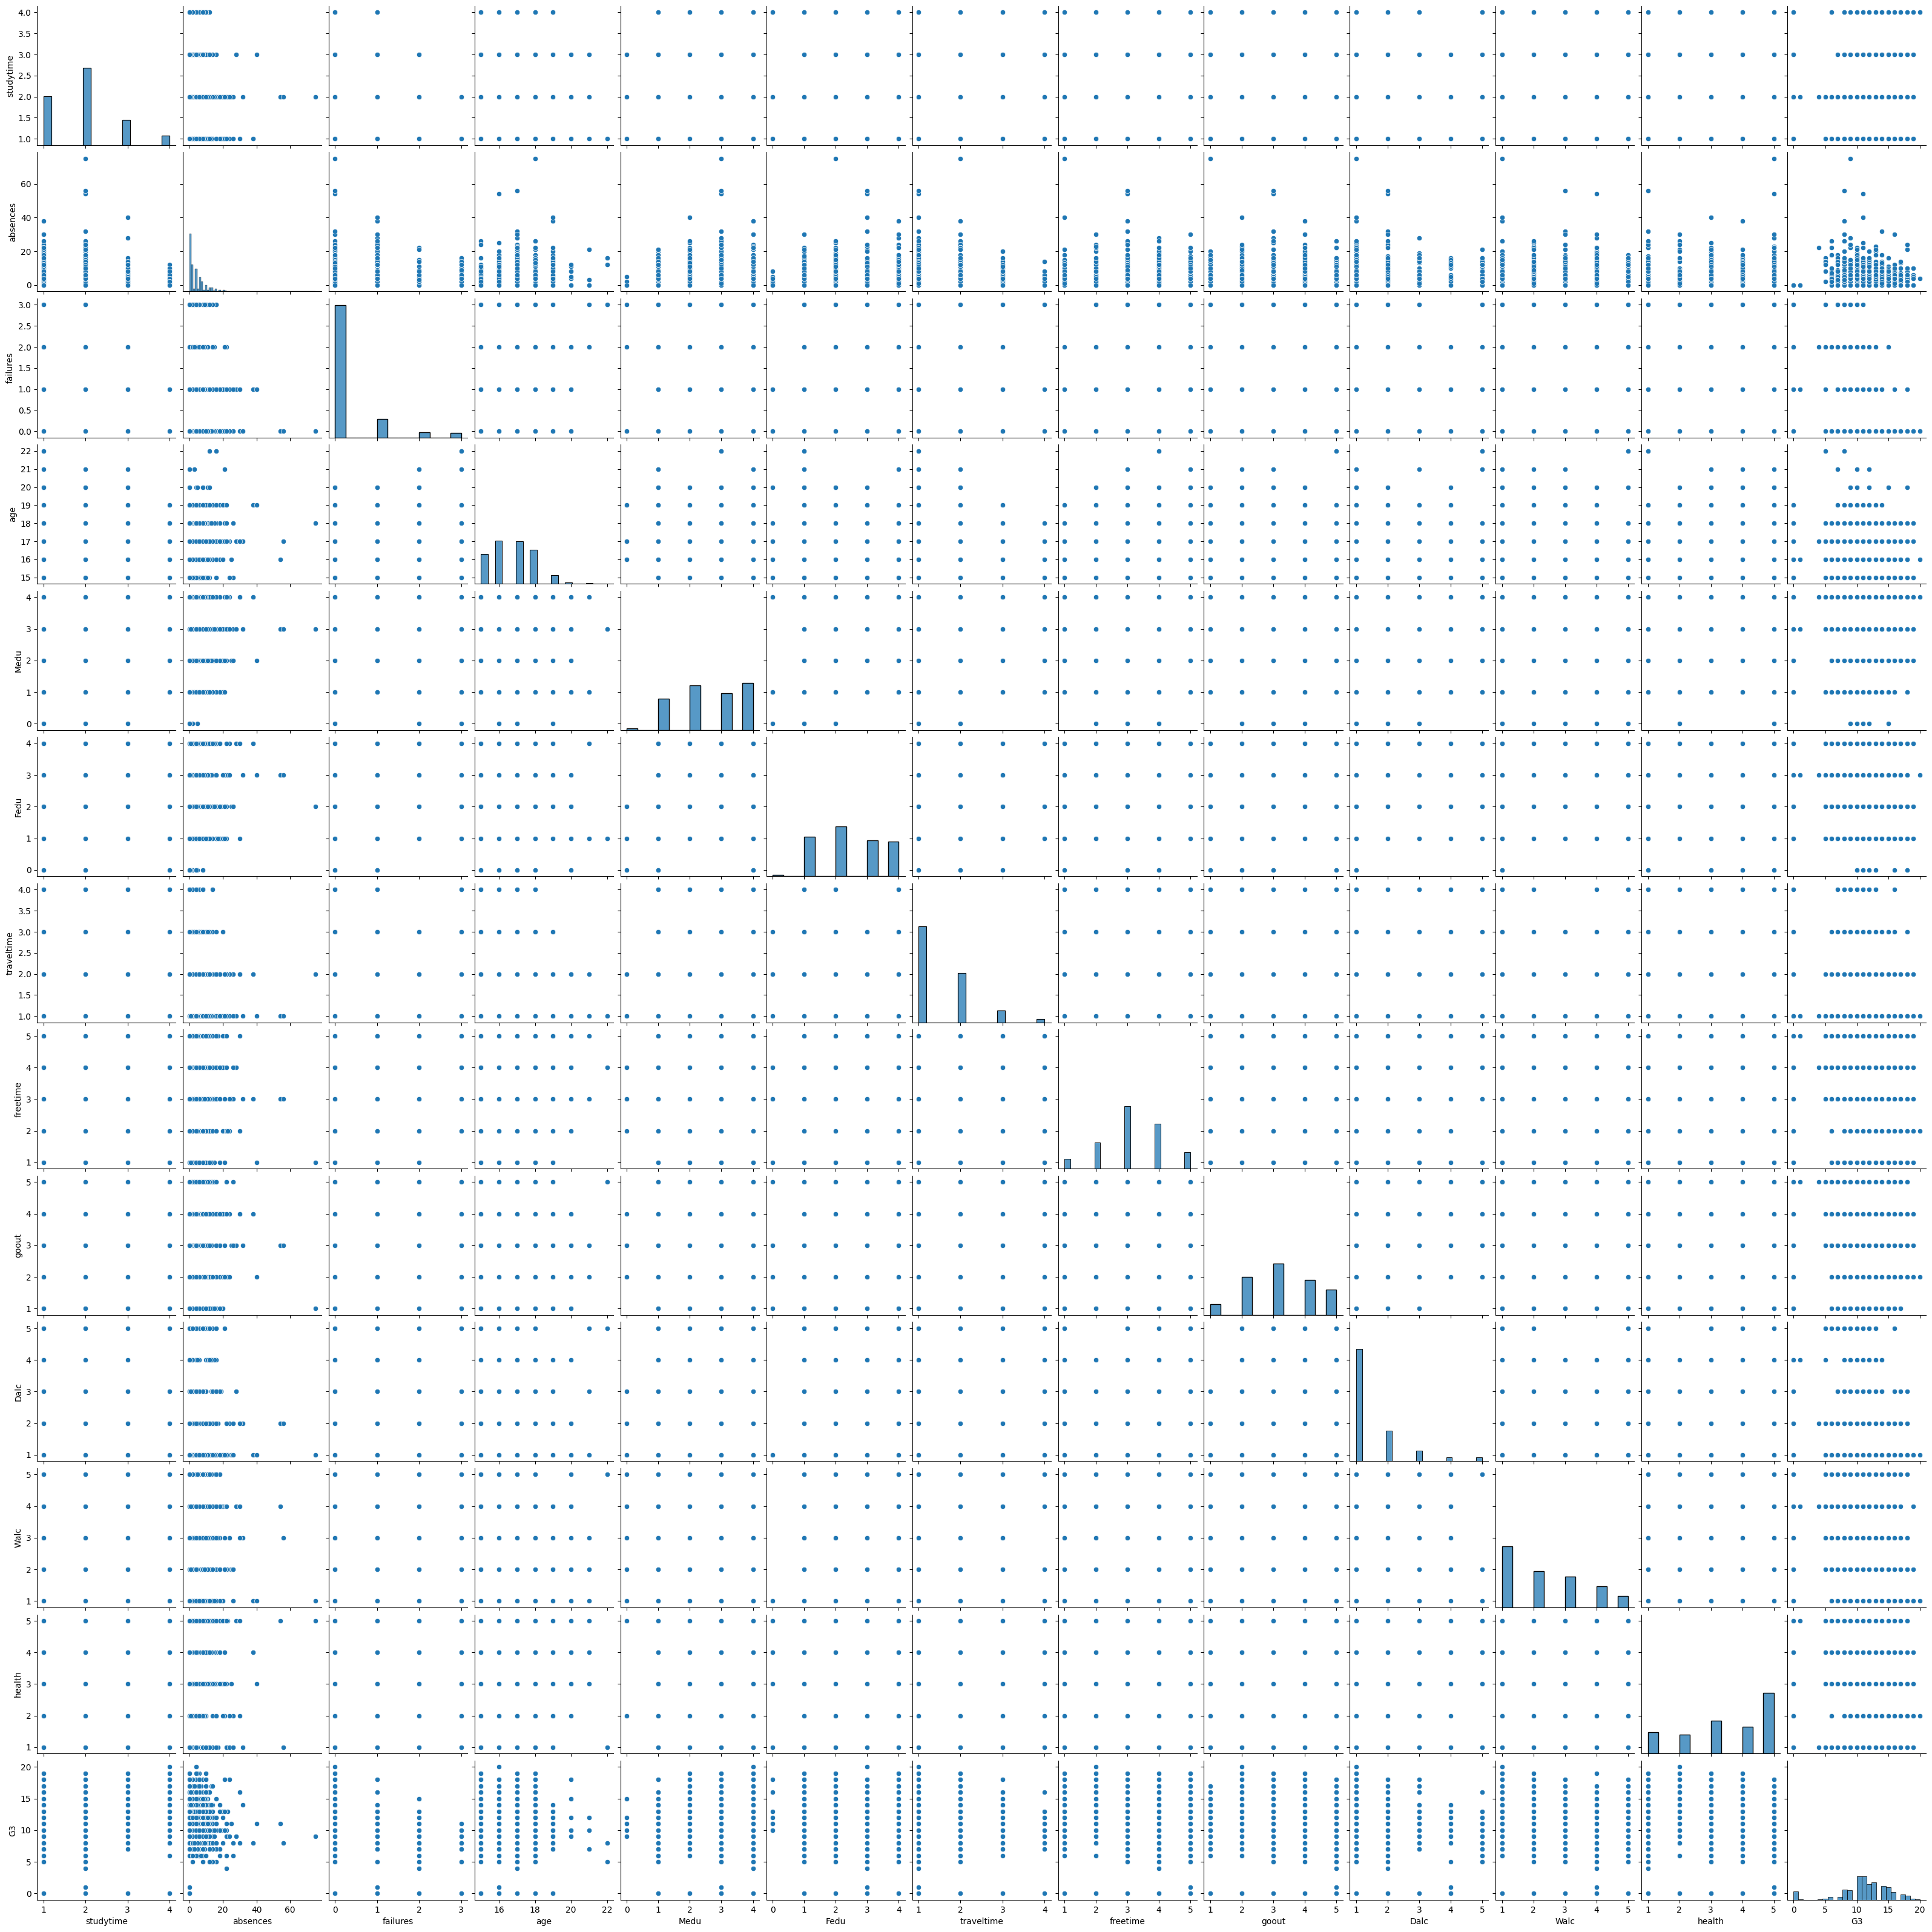

In [ ]:
# Explore the data
sns.pairplot(df[selected_features + [target]])
plt.show()

In [ ]:
# Split the data into features (X) and target (y)
X = df[selected_features]
y = df[target]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 14.287660649899378
Root Mean Squared Error: 3.7799022011024808
R^2 Score: 0.07587939650273845


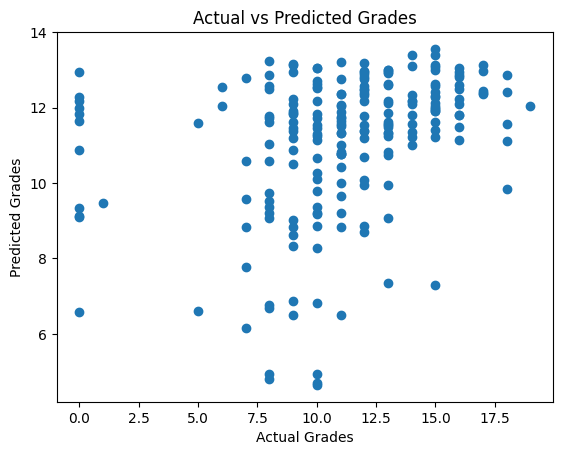

In [ ]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.show()

In [ ]:
# Print the model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: 10.406228490774037
Coefficients: [ 0.39363772 -0.01808577 -2.19284204  0.04328041  0.35113129  0.15191516
 -0.19272474 -0.00306525 -0.05378517 -0.18416203  0.0846854  -0.17312488]
